# Etapa Pré

## Pré 1 - Bibliotecas / Pacotes usados

In [1]:
#%pip install pandas
#%pip install seaborn
#%pip install numpy
#%pip install matplotlib.pyplot
#%pip install -U scikit-learn 

 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Pré 2 - Funções

In [2]:
# ===================================================================
# Configura os gráficos
def jupyter_settings():
    %matplotlib inline
    # %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [22, 9]
    plt.rcParams['font.size'] = 21

    # display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    # configura o pandas para quantidade de casas decimais
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()

jupyter_settings()

## Pré 3 - Lendo os dados - Parte 1

In [3]:
df_raw = pd.read_csv('../banco/train.csv',)

In [4]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


# Etapa 1 - Entendendo os dados

In [5]:
df1 = df_raw.copy()

In [6]:
# Visão geral das primeiras linhas
df1.head()        #primeiras 5 linhas
# df1.tail()      #últimas 5 linhas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


## 1.1 Renomeando colunas

In [7]:
# Lista dos nomes das variáveis 
df1.columns   #atributo

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Renomear as colunas que estão em inglês
df1.rename(columns = {'PassengerId':'id_passageiro'
,'Survived':'sobrevivencia'
,'Pclass':'classe_ingresso'
,'Name':'nome'
,'Sex':'sexo'
,'Age':'idade'
,'SibSp':'n_irmao_conjuge_bordo'
,'Parch':'n_pais_filhos_bordo'
,'Ticket':'n_bilhete'
,'Fare':'tarifa_passageiro'
,'Cabin':'n_cabine'
,'Embarked':'porto_embarcacao'}, inplace=True)

df1.columns

Index(['id_passageiro', 'sobrevivencia', 'classe_ingresso', 'nome', 'sexo',
       'idade', 'n_irmao_conjuge_bordo', 'n_pais_filhos_bordo', 'n_bilhete',
       'tarifa_passageiro', 'n_cabine', 'porto_embarcacao'],
      dtype='object')

## 1.2 Dimensões dos dados

In [9]:
qtd_de_linhas = df1.shape[0]
qtd_de_colunas = df1.shape[1]
n_de_cada_var = df1.count()


print(f'O banco possui', qtd_de_linhas, 'linhas e', qtd_de_colunas, 'colunas.')
print(f'')
print(n_de_cada_var)

O banco possui 891 linhas e 12 colunas.

id_passageiro            891
sobrevivencia            891
classe_ingresso          891
nome                     891
sexo                     891
idade                    714
n_irmao_conjuge_bordo    891
n_pais_filhos_bordo      891
n_bilhete                891
tarifa_passageiro        891
n_cabine                 204
porto_embarcacao         889
dtype: int64


## 1.3 Verificando NA (missings)
### Conferindo a quantidade de missing em cada variável

In [10]:
check_na_var = df1.isnull().sum()

In [11]:
print(check_na_var)

id_passageiro              0
sobrevivencia              0
classe_ingresso            0
nome                       0
sexo                       0
idade                    177
n_irmao_conjuge_bordo      0
n_pais_filhos_bordo        0
n_bilhete                  0
tarifa_passageiro          0
n_cabine                 687
porto_embarcacao           2
dtype: int64


## 1.4 Tipos de dados

In [12]:
df1.dtypes

id_passageiro              int64
sobrevivencia              int64
classe_ingresso            int64
nome                      object
sexo                      object
idade                    float64
n_irmao_conjuge_bordo      int64
n_pais_filhos_bordo        int64
n_bilhete                 object
tarifa_passageiro        float64
n_cabine                  object
porto_embarcacao          object
dtype: object

## 1.5 Modificações dos tipos

In [13]:
# Alterar o tipo da variável duração do sono conforme exemplo abaixo:
# df['Idade'] = df['Idade'].astype('int64')
# df['Duração do sono'] = df['Duração do sono'].apply(lambda x: x.replace(',', '.'))
#lembrar que isso poderia ser corrigido na abertura do banco de dados [ex.: sep=","].
# df['Duração do sono'] = df['Duração do sono'].astype('float64')
# df['nascimento'] = pd.to_datetime(df['nascimento'], dayfirst=True)

# df1['sobrevivencia'] = df1['sobrevivencia'].astype('boolean')
# df1['classe_ingresso'] = df1['classe_ingresso'].astype(str)

In [14]:
df1.dtypes

id_passageiro              int64
sobrevivencia              int64
classe_ingresso            int64
nome                      object
sexo                      object
idade                    float64
n_irmao_conjuge_bordo      int64
n_pais_filhos_bordo        int64
n_bilhete                 object
tarifa_passageiro        float64
n_cabine                  object
porto_embarcacao          object
dtype: object

## 1.6 Conjunto das variáveis QUANTITATIVAS (Numerical Features)
### Separando os atributos entre numéricos e categóricos

In [15]:
quantitativa_variavel = df1.select_dtypes(include = ['int64', 'float64'])

In [16]:
quantitativa_variavel.head()

,id_passageiro,sobrevivencia,classe_ingresso,idade,n_irmao_conjuge_bordo,n_pais_filhos_bordo,tarifa_passageiro
0,1,0,3,22.00,1,0,7.25
1,2,1,1,38.00,1,0,71.28
2,3,1,3,26.00,0,0,7.92
3,4,1,1,35.00,1,0,53.10
4,5,0,3,35.00,0,0,8.05


## 1.7 Conjunto das variáveis QUALITATIVAS (Categorical Features)

In [17]:
qualitativa_variavel = df1[['sobrevivencia','sexo']]

In [18]:
# Plotar a contagem das classes de cada variável categórica
qualitativa_variavel.apply(lambda x: x.unique().shape[0])

sobrevivencia    2
sexo             2
dtype: int64

In [19]:
qualitativa_variavel.head()

,sobrevivencia,sexo
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


## 1.8 Desfecho / Target Feature

In [20]:
# Contagem das classes
#contagem = qualitativa_variavel['sobrevivencia'].value_counts()

# Percentual das classes
#percentagem = (df1['sobrevivencia'].value_counts(normalize=True) * 100).round(2)

# Criar o dataframe resultante
#resultado = pd.DataFrame({'Classe': contagem.index
                    #,'Contagem': contagem
                    #,'Percentual': percentagem})

# Imprimir o dataframe resultante
#display(resultado)


# Etapa 2 - Análise exploriatória de dados 

In [21]:
df2 = df1.copy()
df2.drop(columns=['nome', 'n_bilhete', 'n_cabine'], inplace = True)
df2.head()

,id_passageiro,sobrevivencia,classe_ingresso,sexo,idade,n_irmao_conjuge_bordo,n_pais_filhos_bordo,tarifa_passageiro,porto_embarcacao
0,1,0,3,male,22.00,1,0,7.25,S
1,2,1,1,female,38.00,1,0,71.28,C
2,3,1,3,female,26.00,0,0,7.92,S
3,4,1,1,female,35.00,1,0,53.10,S
4,5,0,3,male,35.00,0,0,8.05,S


## 2.1 Análise das variáveis QUANTITATIVAS

### 2.1.1 Estatística QUANTITATIVAS - Univariável

In [22]:
descritiva_das_var = quantitativa_variavel.describe().T
display(descritiva_das_var)

,count,mean,std,min,25%,50%,75%,max
id_passageiro,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00
sobrevivencia,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
classe_ingresso,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
idade,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
n_irmao_conjuge_bordo,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
n_pais_filhos_bordo,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
tarifa_passageiro,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


### 2.1.2 Gráfico QUANTITATIVAS - Univariável

### BoxPlot

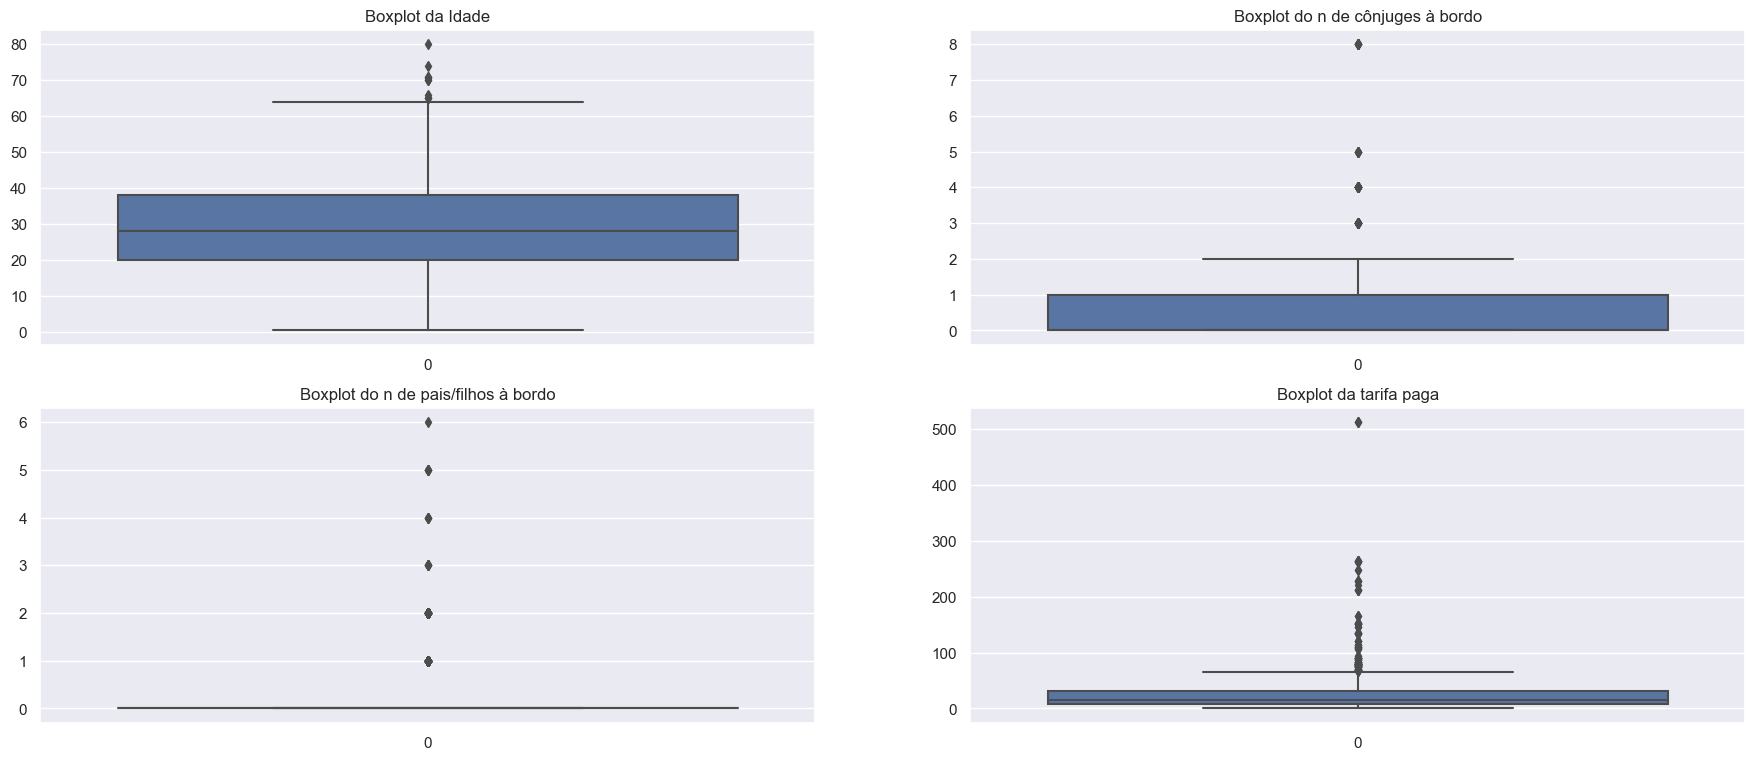

In [23]:
# Plotar gráficos univariada
plt.subplot(2, 2, 1)
sns.boxplot(df2['idade']).set(title = 'Boxplot da Idade', xlabel = None, ylabel = None)
plt.subplot(2, 2, 2)
sns.boxplot(df2['n_irmao_conjuge_bordo']).set(title = 'Boxplot do n de cônjuges à bordo', xlabel = None, ylabel = None)
plt.subplot(2, 2, 3)
sns.boxplot(df2['n_pais_filhos_bordo']).set(title = 'Boxplot do n de pais/filhos à bordo', xlabel = None, ylabel = None)
plt.subplot(2, 2, 4)
sns.boxplot(df2['tarifa_passageiro']).set(title = 'Boxplot da tarifa paga', xlabel = None, ylabel = None);

<Axes: >

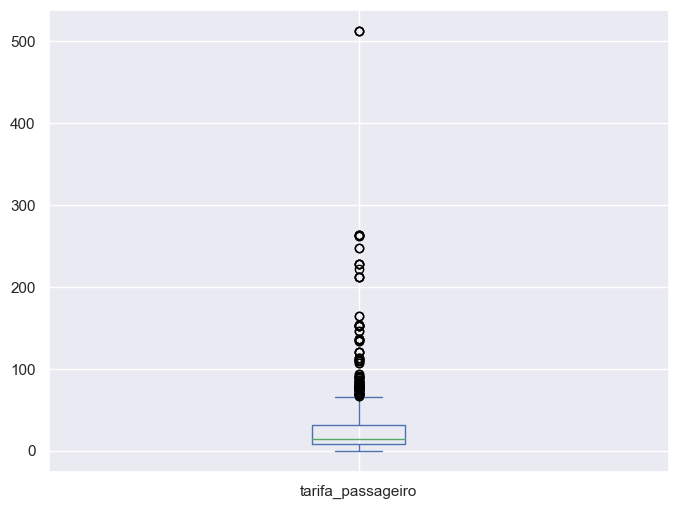

In [24]:
df2["tarifa_passageiro"].plot.box(grid = True, figsize=(8, 6)) #pandas

### Histograma

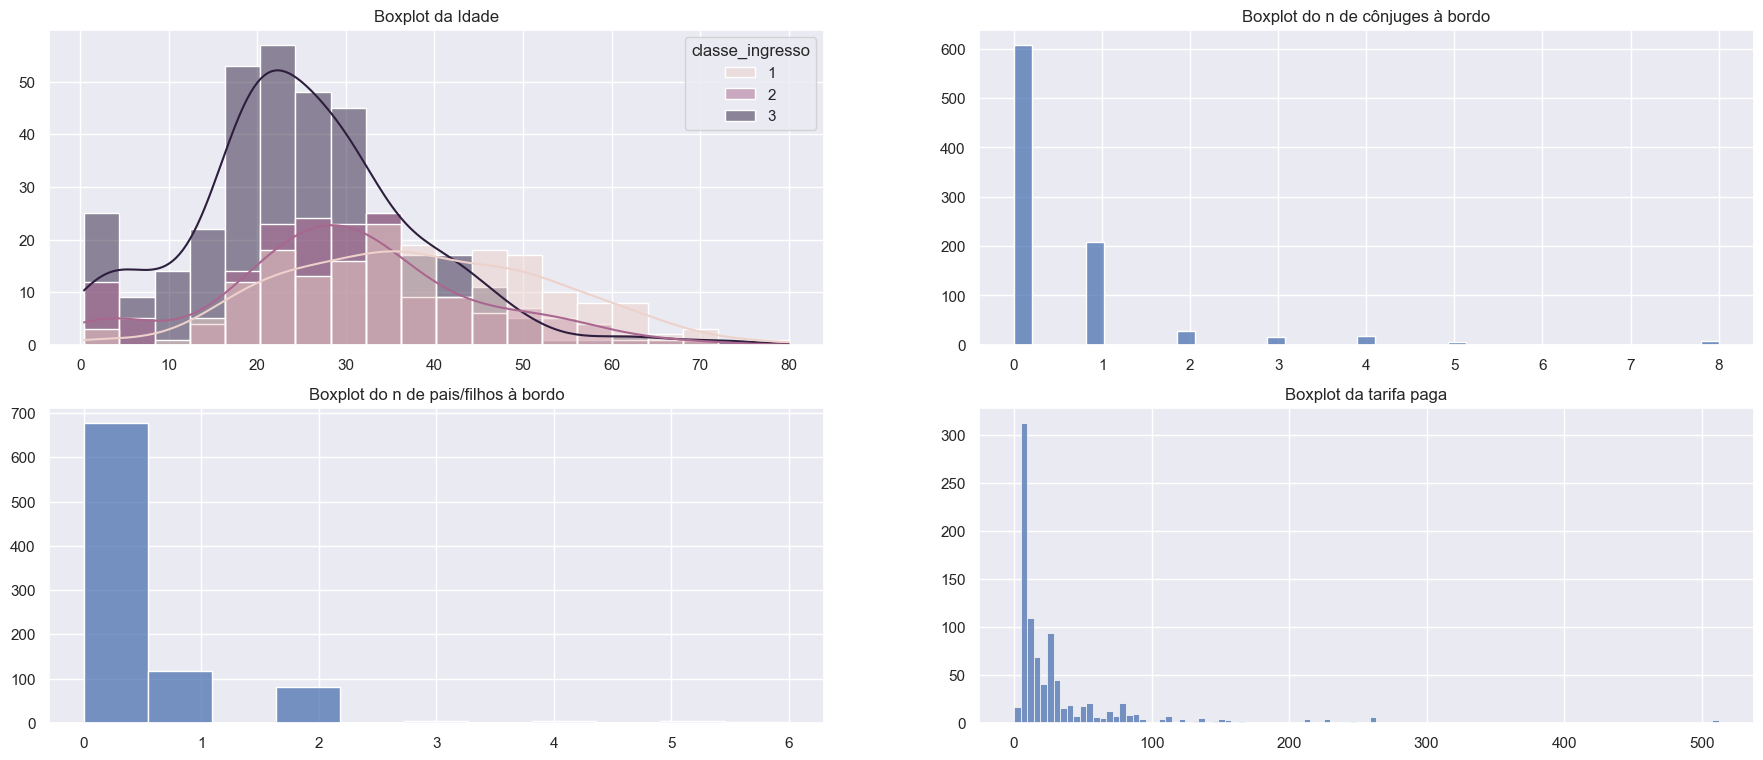

In [25]:
# Plotar gráficos univariada
plt.subplot(2, 2, 1)
sns.histplot(df2, x = 'idade', hue = "classe_ingresso", kde = True).set(title = 'Boxplot da Idade', xlabel = None, ylabel = None)
plt.subplot(2, 2, 2)
sns.histplot(df2['n_irmao_conjuge_bordo']).set(title = 'Boxplot do n de cônjuges à bordo', xlabel = None, ylabel = None)
plt.subplot(2, 2, 3)
sns.histplot(df2['n_pais_filhos_bordo']).set(title = 'Boxplot do n de pais/filhos à bordo', xlabel = None, ylabel = None)
plt.subplot(2, 2, 4)
sns.histplot(df2['tarifa_passageiro']).set(title = 'Boxplot da tarifa paga', xlabel = None, ylabel = None);

In [26]:
# df2["tarifa_passageiro"].hist(bins = 20, figsize = (8,6))

## 2.2 Análise das variáveis QUALITATIVAS

### 2.2.1 Estatística QUALITATIVAS - Univariável

In [27]:
# Plotar todas as classes da variável Ocupação e a contagem de cada classe
df2['sobrevivencia'].value_counts()

sobrevivencia
0    549
1    342
Name: count, dtype: int64

In [28]:
# Contagem das classes
#contagem1 = qualitativa_variavel['sobrevivencia'].value_counts()
#contagem2 = qualitativa_variavel['classe_ingresso'].value_counts()
#contagem3 = qualitativa_variavel['porto_embarcacao'].value_counts()

# Percentual das classes
#percentagem1 = (qualitativa_variavel['sobrevivencia'].value_counts(normalize=True) * 100).round(2)
#percentagem2 = (qualitativa_variavel['classe_ingresso'].value_counts(normalize=True) * 100).round(2)
#percentagem3 = (qualitativa_variavel['porto_embarcacao'].value_counts(normalize=True) * 100).round(2)

# Criar o dataframe resultante
#resultado = pd.DataFrame({'nSobrev': contagem1
#                    ,'%Sobrev': percentagem1
#                    ,'nClasse_ingresso': contagem2
#                    ,'%Classe_ingresso': percentagem2
#                    ,'nPorto_Embarque': contagem3
#                    ,'%Porto_Embarque': percentagem3
#                    }).reset_index()

# Imprimir o dataframe resultante
#display(resultado)

### 2.2.2 Gráficos QUALITATIVAS - Univariável

<Axes: xlabel='classe_ingresso', ylabel='count'>

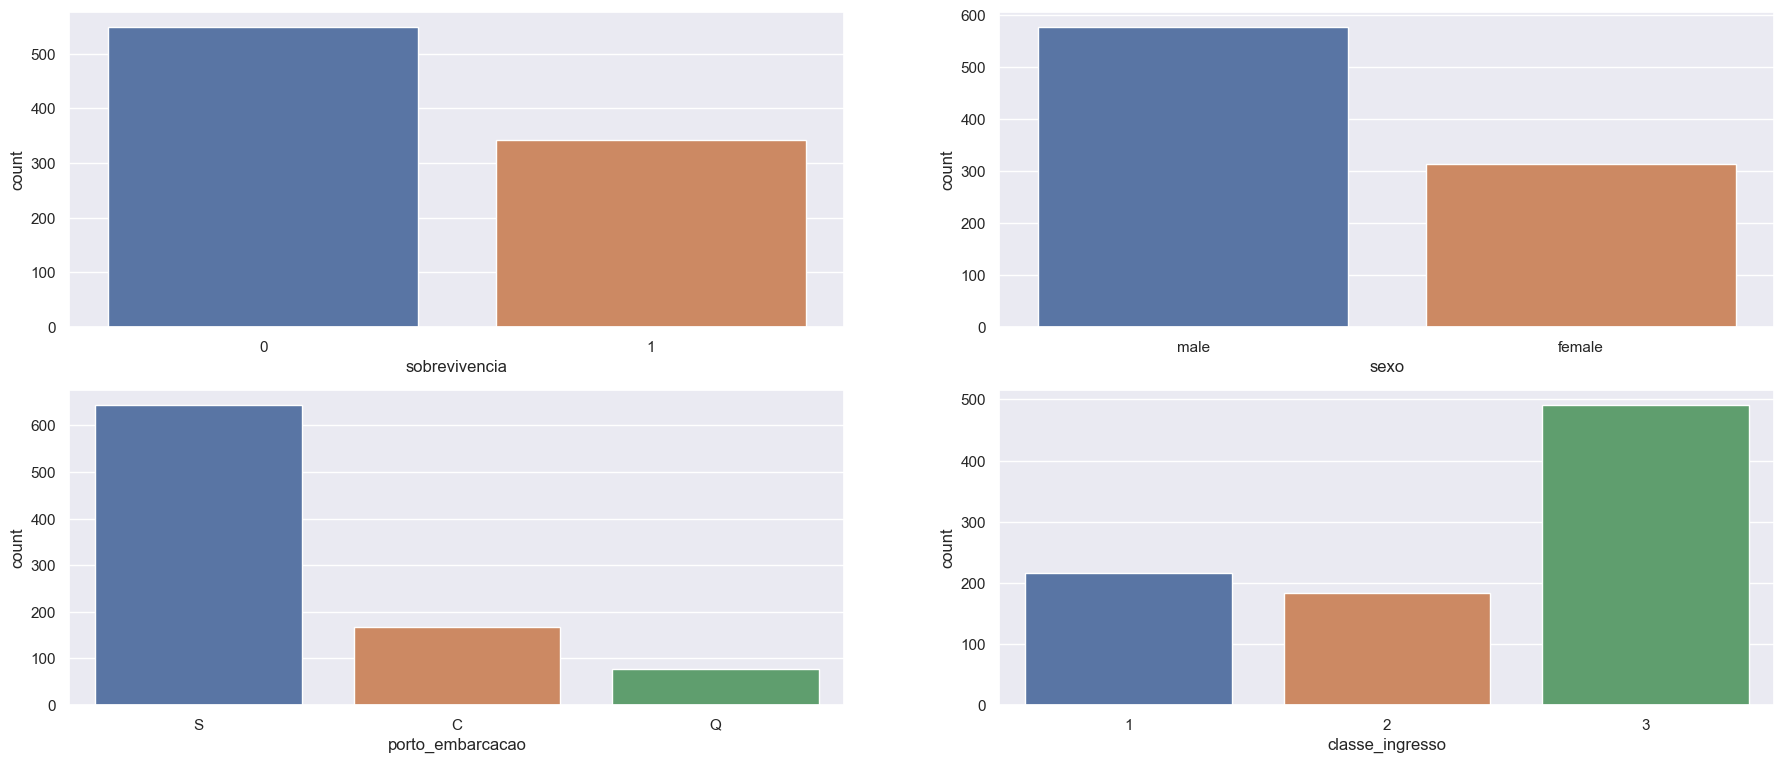

In [29]:
# Plotar gráficos univariada
plt.subplot(2, 2, 1)
sns.countplot(x='sobrevivencia', data=df2)      #gráfico de barras
plt.subplot(2, 2, 2)
sns.countplot(x='sexo', data=df2)                #gráfico de barras
plt.subplot(2, 2, 3)
sns.countplot(x='porto_embarcacao', data=df2)      #gráfico de barras
plt.subplot(2, 2, 4)
sns.countplot(x='classe_ingresso', data=df2)      #gráfico de barras

## 2.3 Análise Bivariadas

In [30]:
##### sns.boxplot(numerical_attributes['salario_medio']).set(title='Salário médio da profissão')
##### sns.displot(data=df, x="escolaridade", kde=True, height=6, aspect=2).set(title='Escolaridade dos trabalhadores', xlabel=None, ylabel='Contagem');
##### df.hist(figsize=(22,8));
##### sns.histplot(df.status).set(title="Variável target");
##### sns.catplot(data=df, x='periodicidade', y='salario_medio', kind='box', height=6, aspect=3,).set(title='Salário médio vs Periodicidade', ylabel='Salário U$', xlabel=None);
##### sns.countplot(data=df, x="escolaridade", hue="status").set(title='Escolaridade x Aprovação do visto', ylabel='Contagem', xlabel=None)
##### corr = numerical_attributes.corr().round(1)
##### corr
##### plt.figure(figsize=(22, 7))
##### heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
##### heatmap.set_title("Mapa de calor - Correlação", fontdict={"fontsize": 12}, pad=12);

### 2.3.1 Análises Correlação

In [31]:
correlacao = quantitativa_variavel.corr(method = 'pearson')
correlacao

,id_passageiro,sobrevivencia,classe_ingresso,idade,n_irmao_conjuge_bordo,n_pais_filhos_bordo,tarifa_passageiro
id_passageiro,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
sobrevivencia,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
classe_ingresso,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
idade,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
n_irmao_conjuge_bordo,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
n_pais_filhos_bordo,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
tarifa_passageiro,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


### 2.3.2 Gráficos - 

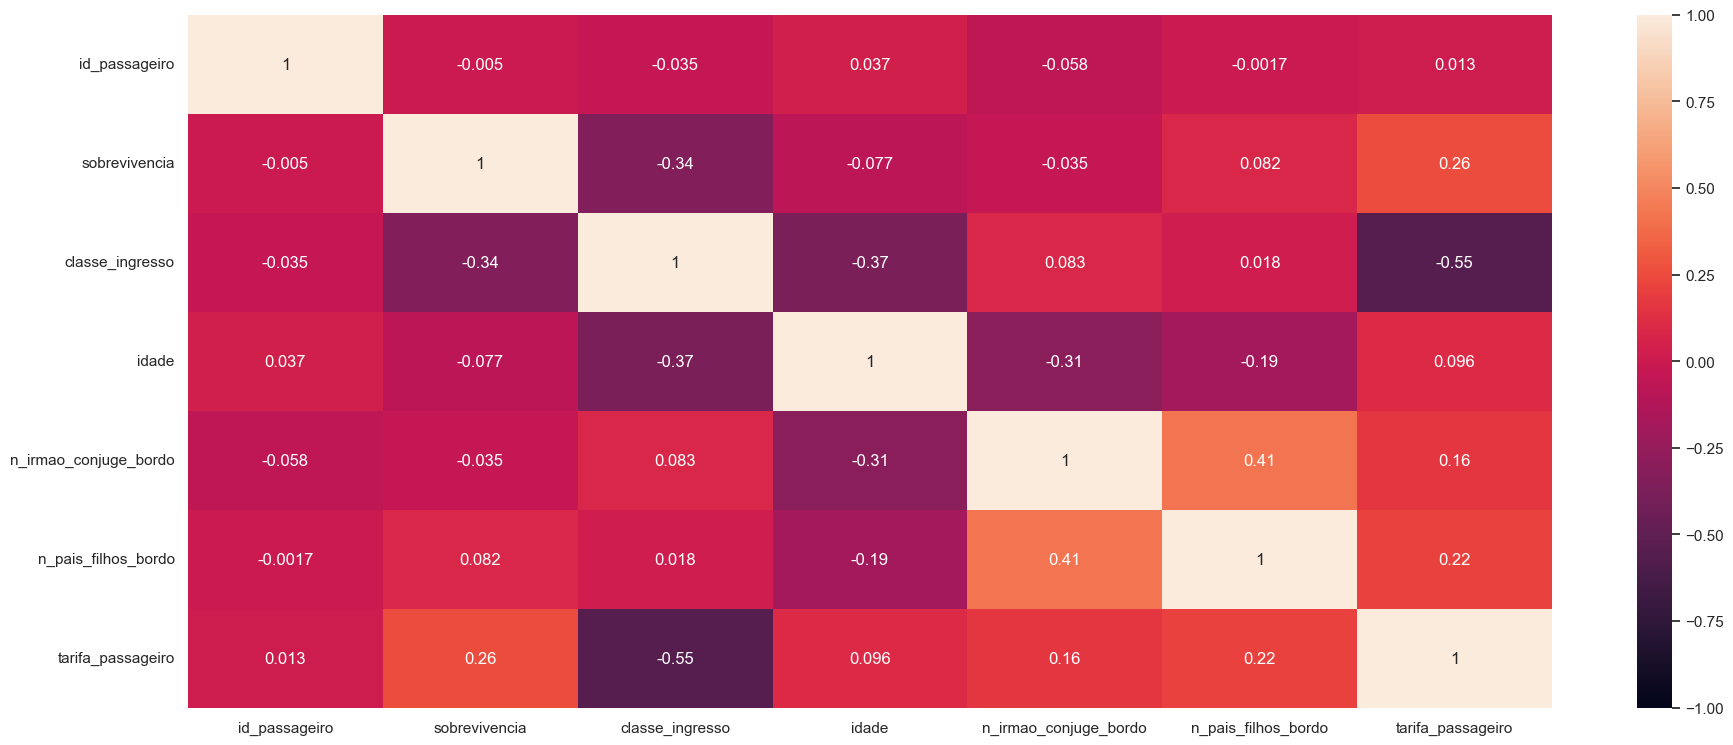

In [32]:
heatmap = sns.heatmap(correlacao, vmin=-1, vmax=1, annot=True)

Text(0.5, 1.0, 'Boxplot da idade dos passageiros')

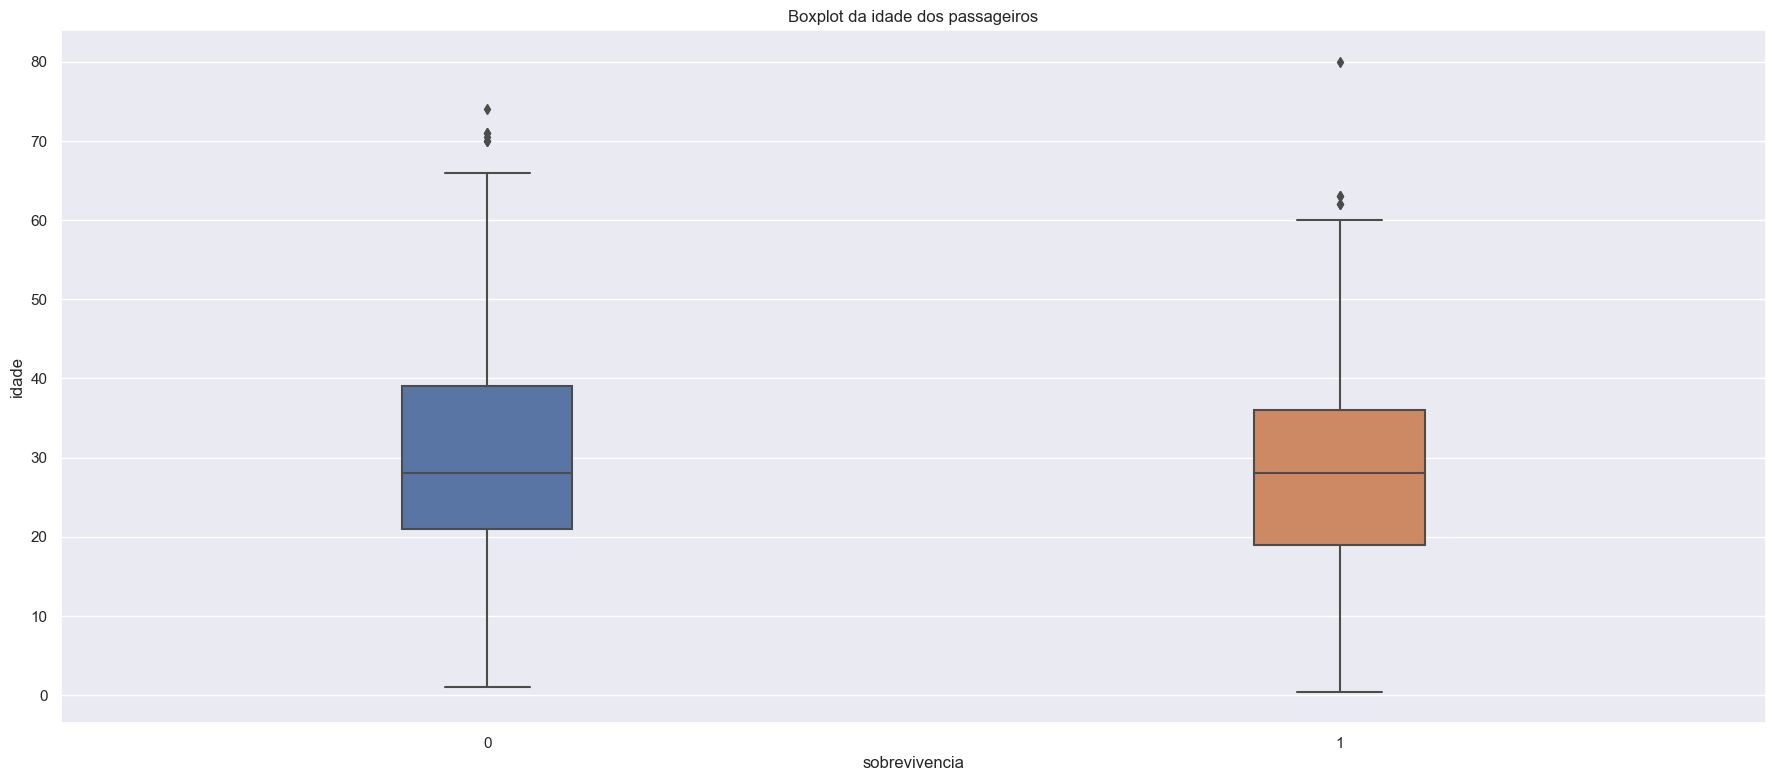

In [33]:

sns.boxplot(y='idade', x = 'sobrevivencia', data=df2, width = 0.2)
plt.title("Boxplot da idade dos passageiros")

<Axes: xlabel='sobrevivencia', ylabel='idade'>

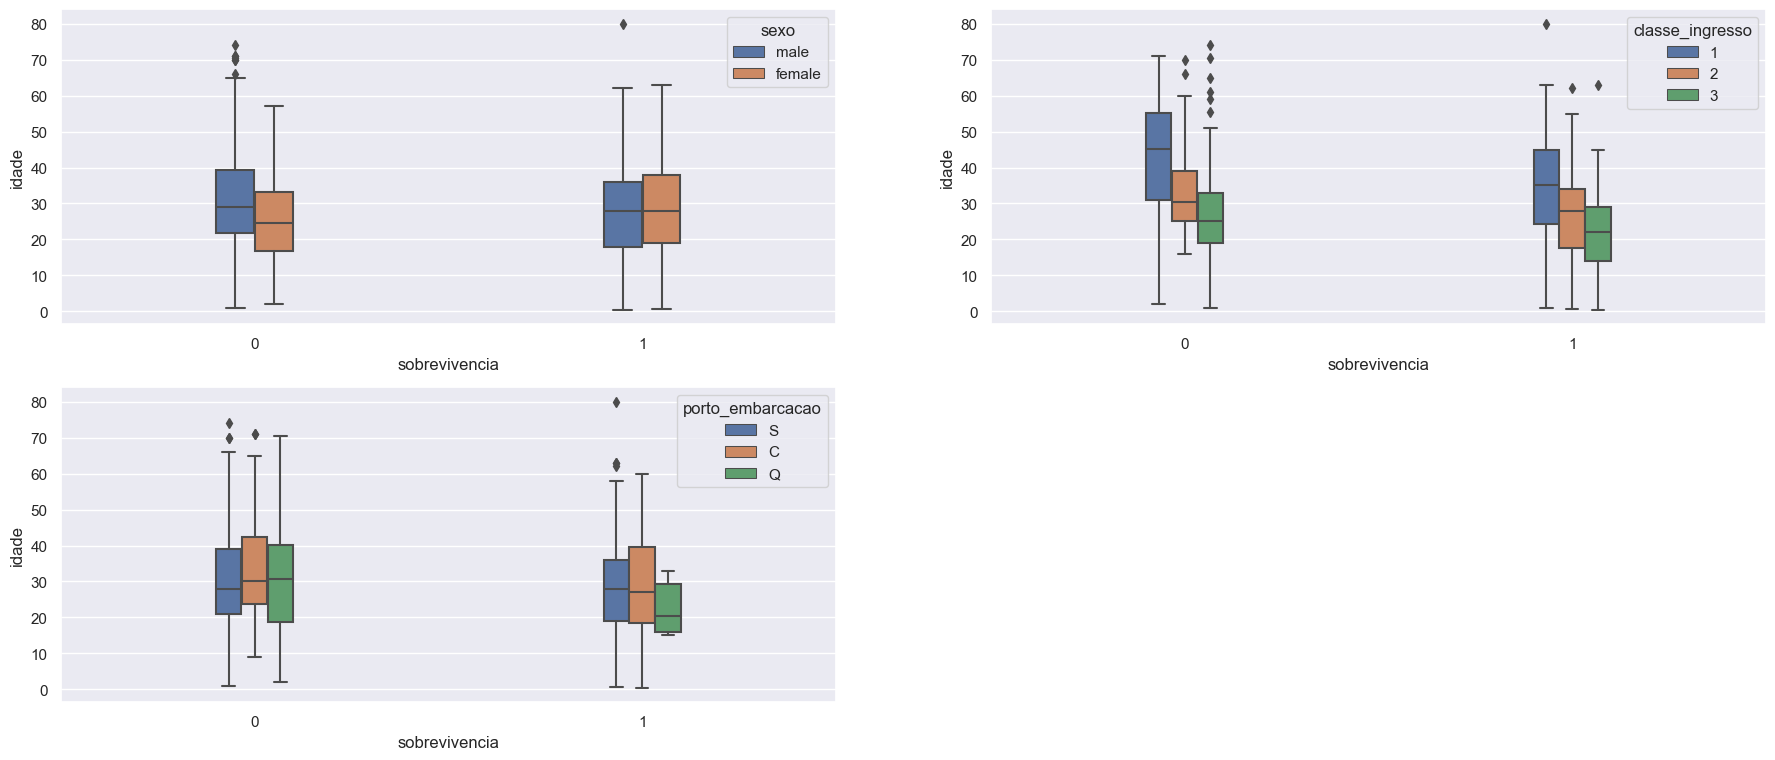

In [34]:
#Boxplot - 2 fatores (três variáveis: 1 quanti e 2 quali)
plt.subplot(2, 2, 1)
sns.boxplot(y='idade', x = 'sobrevivencia', hue = 'sexo', data=df2, width = 0.2)
plt.subplot(2, 2, 2)
sns.boxplot(y='idade', x = 'sobrevivencia', hue = 'classe_ingresso', data=df2, width = 0.2)
plt.subplot(2, 2, 3)
sns.boxplot(y='idade', x = 'sobrevivencia', hue = 'porto_embarcacao', data=df2, width = 0.2)

<Axes: xlabel='sobrevivencia', ylabel='tarifa_passageiro'>

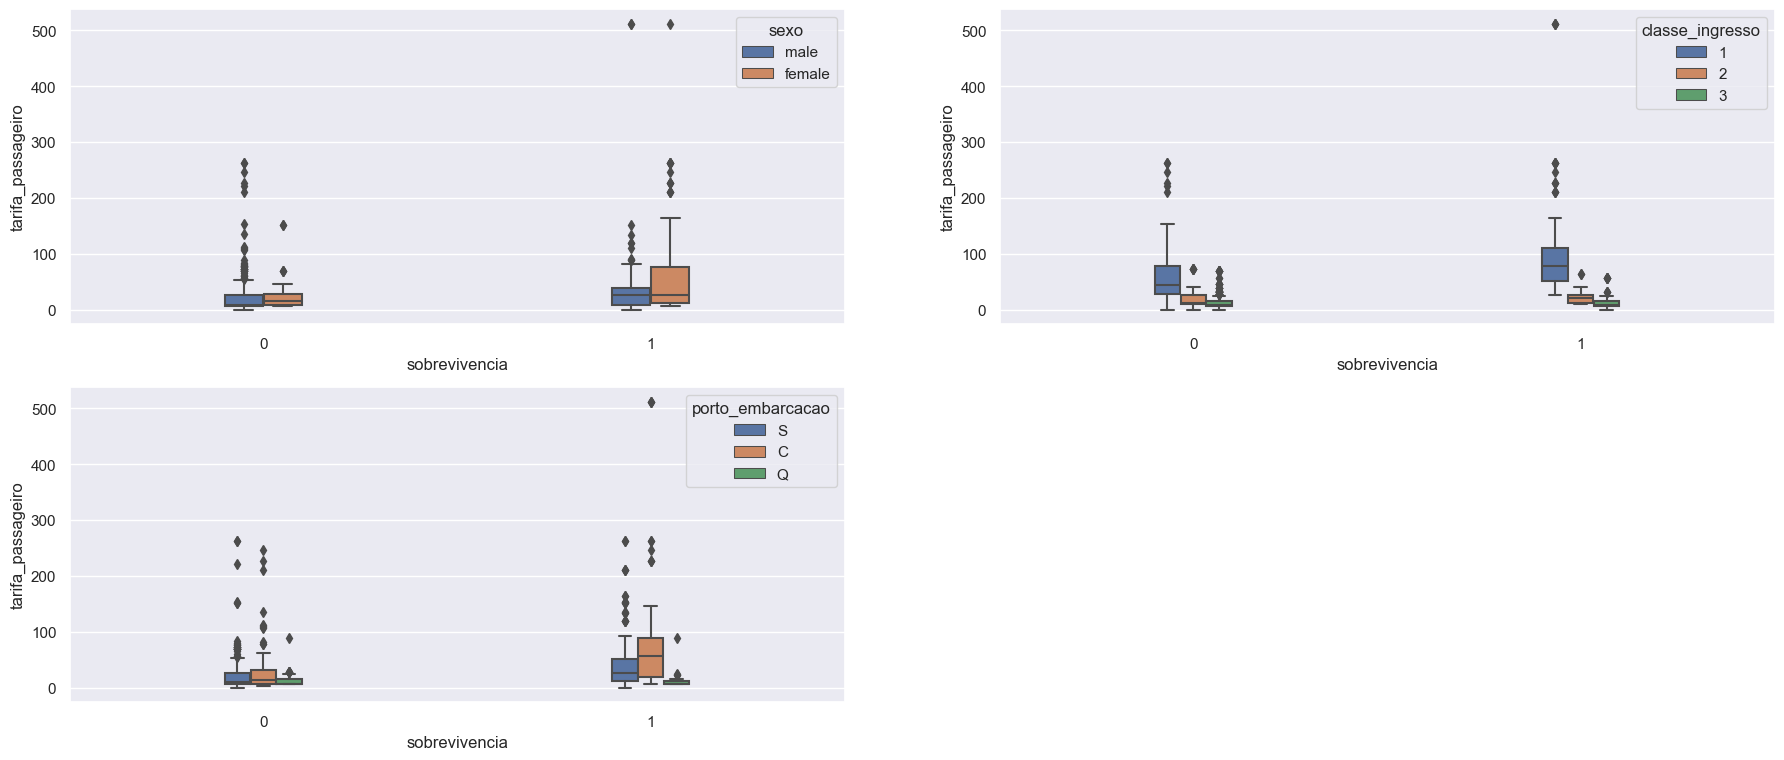

In [35]:
#Boxplot - 2 fatores (três variáveis: 1 quanti e 2 quali)
plt.subplot(2, 2, 1)
sns.boxplot(y='tarifa_passageiro', x = 'sobrevivencia', hue = 'sexo', data=df2, width = 0.2)
plt.subplot(2, 2, 2)
sns.boxplot(y='tarifa_passageiro', x = 'sobrevivencia', hue = 'classe_ingresso', data=df2, width = 0.2)
plt.subplot(2, 2, 3)
sns.boxplot(y='tarifa_passageiro', x = 'sobrevivencia', hue = 'porto_embarcacao', data=df2, width = 0.2)

<Axes: xlabel='idade', ylabel='sobrevivencia'>

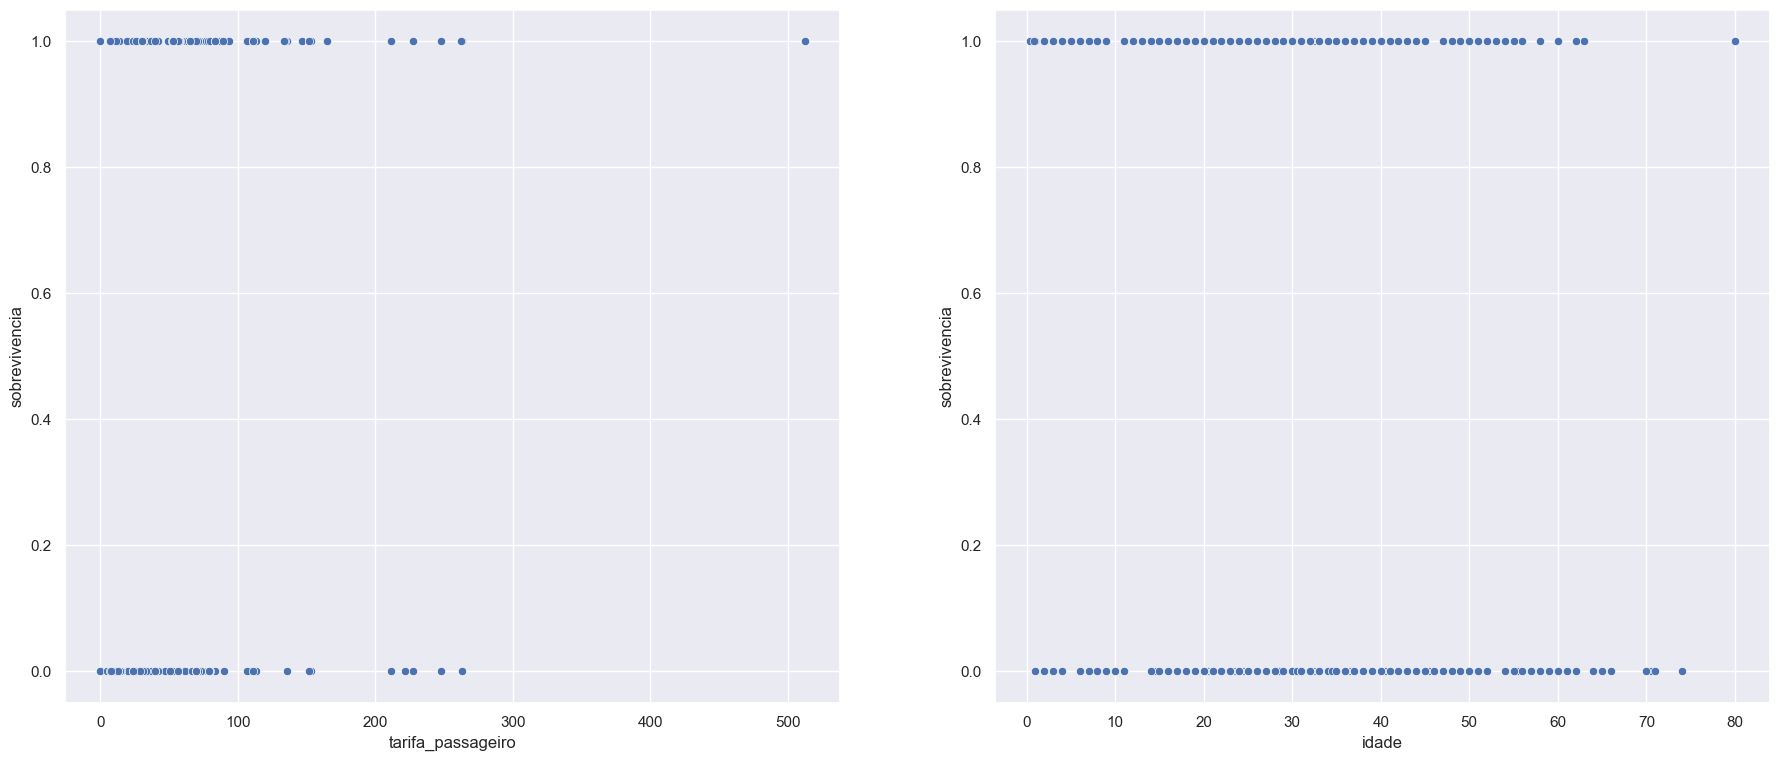

In [36]:
plt.subplot(1, 2, 1)
sns.scatterplot(data = df2, y='sobrevivencia', x = 'tarifa_passageiro')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df2, y='sobrevivencia', x = 'idade')

# Etapa 3 - Seleção das variáveis

In [37]:
df3 = df2.copy()
df3.dtypes

id_passageiro              int64
sobrevivencia              int64
classe_ingresso            int64
sexo                      object
idade                    float64
n_irmao_conjuge_bordo      int64
n_pais_filhos_bordo        int64
tarifa_passageiro        float64
porto_embarcacao          object
dtype: object

In [38]:
# df3.isna().sum()

### Recodificando a variável IDADE.

In [39]:
# df3.idade.isna().sum()
# Preenchendo valores faltantes de uma coluna com valor especificado (mediana)
df3['idade'].fillna(df3['idade'].median(), inplace=True)

In [40]:
q1, q2, q3 = np.percentile(df3['idade'], [25, 50, 75])
print(q1)
print(q2)
print(q3)

22.0
28.0
35.0


In [41]:
# definir condições e escolhas para nova variável

conditions = [
   df3['idade'] < q1,
    (df3['idade'] >= q1) & (df3['idade'] < q2),
    (df3['idade'] >= q2) & (df3['idade'] < q3),
    df3['idade'] >= q3
            ]
choices = [
           'idade - menores que 1º quartil',
           'idade - entre 1º e 2º quartil',
           'idade - entre 2º e 3º quartil',
           'idade - maiores que o 3º quartil'
           ]

# criar nova coluna "var_category" baseada em condições e escolhas
df3['faixa_etaria'] = np.select(conditions, choices)

In [42]:
# definir condições e escolhas para nova variável

conditions = [
   df3['tarifa_passageiro'] < q1,
    (df3['tarifa_passageiro'] >= q1) & (df3['tarifa_passageiro'] < q2),
    (df3['tarifa_passageiro'] >= q2) & (df3['tarifa_passageiro'] < q3),
    df3['tarifa_passageiro'] >= q3
            ]
choices = [
           'tarifa_passageiro - menores que 1º quartil',
           'tarifa_passageiro - entre 1º e 2º quartil',
           'tarifa_passageiro - entre 2º e 3º quartil',
           'tarifa_passageiro - maiores que o 3º quartil'
           ]

# criar nova coluna "pop_category" baseada em condições e escolhas
df3['faixa_tarifa'] = np.select(conditions, choices)

In [43]:
df3.head()

,id_passageiro,sobrevivencia,classe_ingresso,sexo,idade,n_irmao_conjuge_bordo,n_pais_filhos_bordo,tarifa_passageiro,porto_embarcacao,faixa_etaria,faixa_tarifa
0,1,0,3,male,22.00,1,0,7.25,S,idade - entre 1º e 2º quartil,tarifa_passageiro - menores que 1º quartil
1,2,1,1,female,38.00,1,0,71.28,C,idade - maiores que o 3º quartil,tarifa_passageiro - maiores que o 3º quartil
2,3,1,3,female,26.00,0,0,7.92,S,idade - entre 1º e 2º quartil,tarifa_passageiro - menores que 1º quartil
3,4,1,1,female,35.00,1,0,53.10,S,idade - maiores que o 3º quartil,tarifa_passageiro - maiores que o 3º quartil
4,5,0,3,male,35.00,0,0,8.05,S,idade - maiores que o 3º quartil,tarifa_passageiro - menores que 1º quartil


# Etapa 4 - Preparação dos dados

## Separando os dados de treino e teste

In [44]:
df4 = df3.copy()
df4.columns

Index(['id_passageiro', 'sobrevivencia', 'classe_ingresso', 'sexo', 'idade',
       'n_irmao_conjuge_bordo', 'n_pais_filhos_bordo', 'tarifa_passageiro',
       'porto_embarcacao', 'faixa_etaria', 'faixa_tarifa'],
      dtype='object')

In [45]:
y = df4["sobrevivencia"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: sobrevivencia, dtype: int64

In [46]:
label = OrdinalEncoder()
df4[['faixa_etaria', 'faixa_tarifa']] = label.fit_transform(
    df4[['faixa_etaria', 'faixa_tarifa']])

In [47]:
X = df4 [ ['idade', 'classe_ingresso', 'faixa_etaria', 'faixa_tarifa' ] ]

In [48]:
# caracteristica = df4.iloc[,3:10].value
# previsor = df4.iloc[,2].value

In [49]:
# Separa os dados com 70% dos dados para treino e 30% dos dados para teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.7)

In [50]:
print( len(X_treino) )
print( len(X_teste) )

623
268


In [51]:
funcao_logistica = LogisticRegression()
funcao_logistica.fit( X_treino, y_treino )


LogisticRegression()

In [52]:
previsoes = funcao_logistica.predict( X_teste )
previsoes

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [53]:
confusion_matrix ( y_teste, previsoes )

array([[139,  26],
       [ 59,  44]], dtype=int64)

In [54]:
print( classification_report ( y_teste, previsoes ) )

              precision    recall  f1-score   support

           0       0.70      0.84      0.77       165
           1       0.63      0.43      0.51       103

    accuracy                           0.68       268
   macro avg       0.67      0.63      0.64       268
weighted avg       0.67      0.68      0.67       268



In [109]:
df_kaggle_raw = pd.read_csv('../banco/test.csv')

In [110]:
#realizar o mesmo procedimento do banco anterior
df_kaggle = df_kaggle_raw.copy()

In [111]:
df_kaggle.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [112]:
df_kaggle = df_kaggle[['Age', 'Pclass', 'Fare']]

In [113]:
df_kaggle.head()

,Age,Pclass,Fare
0,34.50,3,7.83
1,47.00,3,7.00
2,62.00,2,9.69
3,27.00,3,8.66
4,22.00,3,12.29


In [114]:
df_kaggle.rename(columns = {
'Age':'idade'
,'Pclass':'classe_ingresso'
,'Fare':'tarifa_passageiro'
}, inplace = True)

#'idade', 'classe_ingresso', 'faixa_etaria', 'faixa_tarifa' 

In [115]:
# Preenchendo valores faltantes de uma coluna com valor especificado (mediana)
df_kaggle['idade'].fillna(df_kaggle['idade'].median(), inplace=True)

In [116]:
q1, q2, q3 = np.percentile(df_kaggle['idade'], [25, 50, 75])
print(q1)
print(q2)
print(q3)

23.0
27.0
35.75


In [117]:
# definir condições e escolhas para nova variável

conditions = [
   df_kaggle['idade'] < q1,
    (df_kaggle['idade'] >= q1) & (df_kaggle['idade'] < q2),
    (df_kaggle['idade'] >= q2) & (df_kaggle['idade'] < q3),
    df_kaggle['idade'] >= q3
            ]
choices = [
           'idade - menores que 1º quartil',
           'idade - entre 1º e 2º quartil',
           'idade - entre 2º e 3º quartil',
           'idade - maiores que o 3º quartil'
           ]

# criar nova coluna "var_category" baseada em condições e escolhas
df_kaggle['faixa_etaria'] = np.select(conditions, choices)

In [118]:
# Preenchendo valores faltantes de uma coluna com valor especificado (mediana)
df_kaggle['tarifa_passageiro'].fillna(df_kaggle['tarifa_passageiro'].median(), inplace=True)

In [119]:
q1, q2, q3 = np.percentile(df_kaggle['tarifa_passageiro'], [25, 50, 75])
print(q1)
print(q2)
print(q3)

7.8958
14.4542
31.471875


In [120]:
# definir condições e escolhas para nova variável

conditions = [
   df_kaggle['tarifa_passageiro'] < q1,
    (df_kaggle['tarifa_passageiro'] >= q1) & (df_kaggle['tarifa_passageiro'] < q2),
    (df_kaggle['tarifa_passageiro'] >= q2) & (df_kaggle['tarifa_passageiro'] < q3),
    df_kaggle['tarifa_passageiro'] >= q3
            ]
choices = [
           'tarifa_passageiro - menores que 1º quartil',
           'tarifa_passageiro - entre 1º e 2º quartil',
           'tarifa_passageiro - entre 2º e 3º quartil',
           'tarifa_passageiro - maiores que o 3º quartil'
           ]

# criar nova coluna "pop_category" baseada em condições e escolhas
df_kaggle['faixa_tarifa'] = np.select(conditions, choices)

In [121]:
label = OrdinalEncoder()
df_kaggle[['faixa_etaria', 'faixa_tarifa']] = label.fit_transform(
    df_kaggle[['faixa_etaria', 'faixa_tarifa']])

In [122]:
df_kaggle.head()

,idade,classe_ingresso,tarifa_passageiro,faixa_etaria,faixa_tarifa
0,34.50,3,7.83,1.00,3.00
1,47.00,3,7.00,2.00,3.00
2,62.00,2,9.69,2.00,0.00
3,27.00,3,8.66,1.00,0.00
4,22.00,3,12.29,3.00,0.00


In [123]:
df_kaggle.drop(columns = ['tarifa_passageiro'], inplace = True)

In [124]:
previsoes = funcao_logistica.predict( df_kaggle )
previsoes

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [131]:
submission = df_kaggle_raw[['PassengerId']]

In [132]:
submission['Survived'] = previsoes

C:\Users\Dell\AppData\Local\Temp\ipykernel_15932\1448974057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Survived'] = previsoes


In [133]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [134]:
submission.to_csv('../banco/submission.csv', index = False)

In [ ]:
df4['Sexo_Idade'] = df4.apply(lambda x: x['sexo'] * x['faixa_etaria'] 
                , axis = 1 )